## Lab Exercise_4 - PANDAS - DATA ANALYSIS

### About the dataset (Customer Tip Data)

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

Attribute Information:

**total_bill:** Total bill (cost of the meal), including tax, in US dollars

**tip:** Tip in US dollars

**sex:** Sex of person paying for the meal

**smoker:** There is a smoker in a group or not

**day:** Day on which the order is served

**time:** Time of the order

**size:** Size of the group

**Import the required libraries**

In [2]:
# type your code here
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


#### Load the customer tip dataset and print the first five observations

In [3]:
# type your code here
data_set = pd.read_csv('customer_tip.csv')
data_set.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Let's begin with some hands-on practice exercises

### 1. Print the column names of categorical and numerical variables in the data


In [4]:
# type your code here
print("Categorical Data")
print(data_set.columns[2])
print(data_set.columns[3])
print(data_set.columns[4])
print(data_set.columns[5])
print("")
print("Numerical Data")
print(data_set.columns[0])
print(data_set.columns[1])
print(data_set.columns[6])

Categorical Data
sex
smoker
day
time

Numerical Data
total_bill
tip
size


### 2. Print the average value of Total bill amount and tips

In [5]:
# type your code
print("Average of Total Bill :",data_set.iloc[:,0].mean())
print("Average of Tips :",data_set.iloc[:,1].mean())

Average of Total Bill : 19.785942622950824
Average of Tips : 2.9982786885245902


### 3. Compute the average bill amount for each day


In [6]:
# type your code here
unique_day = data_set['day'].unique()
for i in unique_day:
    print(i," ",data_set[data_set['day']==i]['total_bill'].mean())

Sun   21.410000000000004
Sat   20.441379310344825
Thur   17.682741935483865
Fri   17.151578947368417


### 4. Which gender is more generous in giving the tip?</b>


Female
246.50999999999996
Male
485.07


<AxesSubplot:xlabel='sex'>

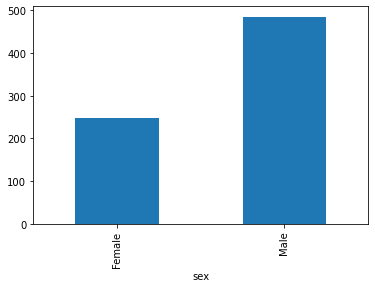

In [15]:
# type your code here
unique_sex = data_set['sex'].unique()
for i in unique_sex:
    print(i)
    print(data_set[data_set['sex']==i]['tip'].sum())
data_set.groupby('sex')['tip'].sum().plot(kind='bar')
    

### 5. According to the data, were there more customers for dinner or lunch? </b>


Dinner
176
Lunch
68


<AxesSubplot:xlabel='time'>

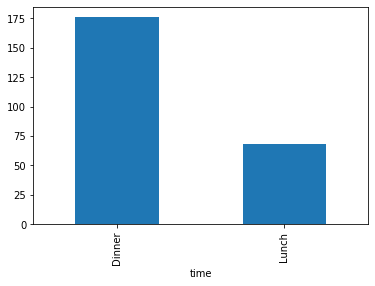

In [18]:
# type your code here
more_cust = data_set['time'].unique()
for i in more_cust:
    print(i)
    print(data_set[data_set['time']==i]['time'].count())
data_set.groupby('time')['size'].count().plot(kind='bar')


### 6. comment on the variable 'tip' based on its measure of dispersion 

In [77]:
# type your code here
data_set['tip'].median()

2.9

In [ ]:
#50% of tips are above 2.9 and 50% tips below 2.9

### 7. Plot the distribution of bill amount and tip and comment about its normality

In [26]:
# type your code here
from scipy import stats
print(data_set['tip'].quantile([0.25,0.5,0.75]))
print("Bill")
print(data_set['total_bill'].quantile([0.25,0.5,0.75]))

print("Graph")


0.25    2.0000
0.50    2.9000
0.75    3.5625
Name: tip, dtype: float64
Bill
0.25    13.3475
0.50    17.7950
0.75    24.1275
Name: total_bill, dtype: float64
Graph


In [ ]:
#there is steady increase in the value of tip and bill amount and there is not outlier effect found

### 8. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot


19.785942622950824
17.795
18.733214285714286


<AxesSubplot:ylabel='Density'>

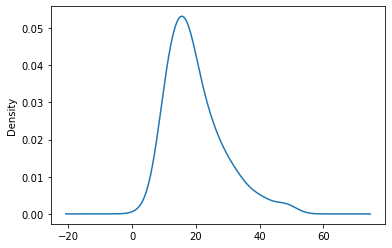

In [21]:
# type your code here
print(data_set['total_bill'].mean())
print(data_set['total_bill'].median())
print(stats.trim_mean(data_set['total_bill'],proportiontocut=0.1))
data_set['total_bill'].plot(kind='kde')

In [ ]:
#Total Bill is not skewed because the is not much difference between the mean and trim mean and also based on the graph shows no skew in TOTAL BILL

### 9. Analyze the realation between bill_amount and tips

In [132]:
total_bill = data_set.agg({'total_bill':'sum'})
total_tip = data_set.agg({'tip':'sum'})
print(total_bill)
print(total_tip)
per_tip = (float(total_tip)*100)/float(total_bill)
per_tip

total_bill    4827.77
dtype: float64
tip    731.58
dtype: float64


15.153580224410026

In [ ]:
#15% of bill amount is tip

### 10. Find the covaraiance and correlation between bill_amount and tips. Infer the results

In [7]:
bill_amt = data_set['total_bill']
tip_amt = data_set['tip']
covariance = np.cov(np.stack((bill_amt,tip_amt)))
print("Covariance")
print(covariance)
correlation = np.corrcoef(bill_amt, tip_amt)
print("")
print("Correlation")
print(correlation)

Covariance
[[79.25293861  8.32350163]
 [ 8.32350163  1.91445464]]

Correlation
[[1.         0.67573411]
 [0.67573411 1.        ]]


In [ ]:
#Bill amount and tips have positive correlation

### 11. Analyze the realtion between bill_amount, tips and sex

In [115]:
print(data_set.groupby('sex').agg({'total_bill':'sum','tip':'sum'}))

        total_bill     tip
sex                       
Female     1570.95  246.51
Male       3256.82  485.07


In [ ]:
#Male customers have lunch/Dinner in the restaurent more

### 12. Find the average number of customer for dinner and Lunch for each day 

In [47]:
round(data_set.groupby(['day', 'time'])['size'].mean())

day   time  
Fri   Dinner    2.0
      Lunch     2.0
Sat   Dinner    3.0
Sun   Dinner    3.0
Thur  Dinner    2.0
      Lunch     2.0
Name: size, dtype: float64

### 13. Find the average bill-amount  for dinner and Lunch for each day

In [51]:
data_set.groupby(['day','time'])['total_bill'].mean()

day   time  
Fri   Dinner    19.663333
      Lunch     12.845714
Sat   Dinner    20.441379
Sun   Dinner    21.410000
Thur  Dinner    18.780000
      Lunch     17.664754
Name: total_bill, dtype: float64

### 14. Comment about the tips given by the smokers

In [69]:
smoker_count = data_set['smoker'].unique()
for i in smoker_count:
    print(i," ",data_set[data_set['smoker']==i]['tip'].sum())
    
#Non-smokers tip more

No   451.77
Yes   279.81


### 15.Create a Pivot table with sex and smokers with their average tip amount

In [7]:
print(data_set.groupby(['sex','smoker']).agg({'tip':'mean'}))
print(data_set.pivot_table(index='sex',columns='smoker',values='tip',aggfunc='mean'))

                    tip
sex    smoker          
Female No      2.773519
       Yes     2.931515
Male   No      3.113402
       Yes     3.051167
smoker        No       Yes
sex                       
Female  2.773519  2.931515
Male    3.113402  3.051167


### 16. Compute the tips per person for each observation (tips/size)

In [74]:
data_set.groupby(['size']).agg({'tip':'sum'})

,tip
size,
1,5.75
2,402.84
3,128.94
4,153.01
5,20.14
6,20.90
